Exercise 6.7

Look at the current going into the V1 junction. We have:
$I_+ = I_2 + I_3$

$\frac{V_+ - V_1}{R} = \frac{V_1 - V_2}{R} + \frac{V_1 - V_3}{R}$

Multiplying by R gives us:

$V_+ - V_1 = 2V_1 - V_2 - V_3$ or 

$3V_1 - V_2 - V_3 = V_+$

Now look at the current going into the junction where V2 is measured. There are 4 sets of current going in and out. It is connected to $V_+, V_1, V_2, V_3$ and $V_4$. Note that $V_4$ isn't shown but is the juntion to the right of $V_2$. So:

$\frac{V_+ - V_2}{R} = \frac{V_2 - V_1}{R} + \frac{V_2 - V_3}{R} + \frac{V_2 - V_4}{R}$. Rearranging gives:

$-V_1 + 4V_2 - V_2 - V_3 = V_+$

The next junctions do not have V_+ connected to them but instead an addition $V_i$ so the next one, for example, is:

$-V_1 -V_2 + 4V_3 - V_4 - V_5 = 0$

and

$-V_{i-2} -V_{i-1} + 4V_i - V_{i+1} - V_{i+2} = 0$

all the way up to the last two, which are the same as the first two but without $V_+$:

$-V_{N-3} -V_{N-2} + 4V_{N-1} - V_{N} = 0$

$-V_{N-2} -V_{N-1} + 3V_{N} = 0$





In [ ]:
# banded.py from the book

######################################################################
#
# Function to solve a banded system of linear equations using
# Gaussian elimination and backsubstitution
#
# x = banded(A,v,up,down)
#
# This function returns the vector solution x of the equation A.x = v,
# where v is an array representing a vector of N elements, either real
# or complex, and A is an N by N banded matrix with "up" nonzero
# elements above the diagonal and "down" nonzero elements below the
# diagonal.  The matrix is specified as a two-dimensional array of
# (1+up+down) by N elements with the diagonals of the original matrix
# along its rows, thus:
#
#   (  -   -  A02 A13 A24 ...
#   (  -  A01 A12 A23 A34 ...
#   ( A00 A11 A22 A33 A44 ...
#   ( A10 A21 A32 A43 A54 ...
#   ( A20 A31 A42 A53 A64 ...
#
# Elements represented by dashes are ignored -- it doesn't matter what
# these elements contain.  The size of the system is taken from the
# size of the vector v.  If the matrix A is larger than NxN then the
# extras are ignored.  If it is smaller, the program will produce an
# error.
#
# The function is compatible with version 2 and version 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, September 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import copy

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v


In [ ]:
# Exercise 6.7 for N junctions
from numpy import empty, zeros
from matplotlib.pyplot import plot,show,ylim,xlabel,ylabel

def plotCircuit(N,Vp):
  # Set up initial values
  A = zeros([N-1,N],float)
  # Remembering that A looks like this (it's not the full matrix), where '-' are ignored
  #   (  -   -  A02 A13 A24 ...
  #   (  -  A01 A12 A23 A34 ...
  #   ( A00 A11 A22 A33 A44 ...
  #   ( A10 A21 A32 A43 A54 ...
  #   ( A20 A31 A42 A53 A64 ...

  # Compare these values to our system of equations
  A[0,:] = -1
  A[1,:] = -1
  A[2,:] = 4 ### First and last columns to be changed
  A[3,:] = -1
  A[4,:] = -1
  A[2,0] = 3.0
  A[2,N-1] = 3.0

  v = zeros(N,float)
  v[0] = v[1] = Vp

  # Solve
  w = banded(A,v,2,2)

  # Plot
  plot(range(1,N+1),w)
  plot(range(1,N+1),w,"ko")
  ylim(0,Vp*1.1)
  xlabel("Value at junction i = ")
  ylabel("V")
  show()


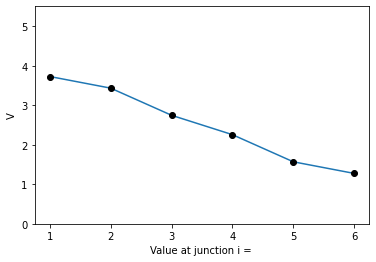

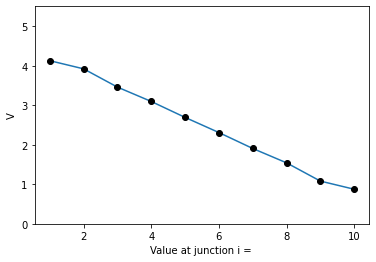

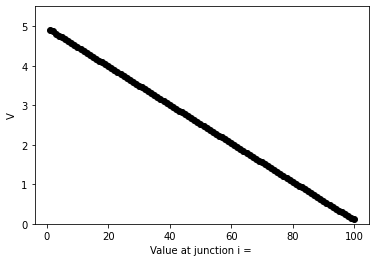

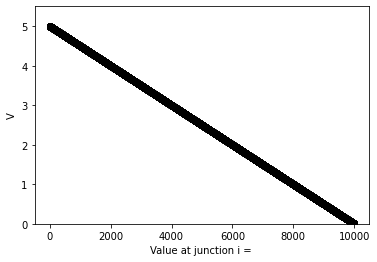

In [ ]:
# Can see it is linearly decreasing except for at the edges
plotCircuit(6,5.0)
plotCircuit(10,5.0)
plotCircuit(100,5.0)
plotCircuit(10000,5.0)

Exercise 6.9

a) We set $\psi(x) = \sum_n \psi_n \sin{n\pi x/L}$ and substitute into $\hat{H}\psi = E\psi$:

$\hat{H} \sum_n \psi_n \sin{n\pi x/L} = \sum_n E \psi_n \sin{n\pi x/L}$

Now multiply by $\sin{m\pi x/L}$ and integrate over x:

$\int_0^L \sum_n \psi_n \sin{m\pi x/L} \hat{H} \sin{n\pi x/L}  dx = \int_0^L \sum_n E \psi_n \sin{n\pi x/L} \sin{m\pi x/L} dx $

$\int_0^L \sum_n \psi_n \sin{m\pi x/L} \hat{H} \sin{n\pi x/L}  dx = \frac{1}{2}{EL}\psi_m $

Thus we have **H $\psi$** = E$\psi$ where $\psi$ is the eigenvector of the Hamiltonian matrix **H** and comparing to the above:

$H_{mn} = \frac{2}{L}\int_0^L \sin{\frac{\pi m x}{L}} \hat{H} \sin{\frac{\pi n x}{L}} dx$

$H_{mn} = \frac{2}{L}\int_0^L \sin{\frac{\pi m x}{L}} [-\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x)] \sin{\frac{\pi n x}{L}} dx$

b) Now we try out explicitly V(x) = ax/L:

$H_{mn} = \frac{2}{L}\int_0^L \sin{\frac{\pi m x}{L}} [-\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + ax/L] \sin{\frac{\pi n x}{L}} dx$

If we look at the kinetic term with derivatives we have the second derivative of a sin, which gives us back a sin, with an additional minus sign and two factors of $\frac{\pi n}{L}$ from the chain rule. So the first term is:

$\frac{-2}{L}\frac{-\hbar^2}{2m}(\frac{\pi n}{L})^2\int_0^L \sin{\frac{\pi m x}{L}} \sin{\frac{\pi n x}{L}} dx$ = $\frac{2 \pi^2 n^2}{L^3}\frac{\hbar^2}{2m} \int_0^L \sin{\frac{\pi m x}{L}} \sin{\frac{\pi n x}{L}} dx$ where from part a this is zero unless $m==n$ in which case we get $\frac{2 \pi^2 n^2}{L^3}\frac{L}{2}\frac{\hbar^2}{2m} = \frac{\pi^2 n^2 \hbar^2}{2mL^2}$

Evaluating the potential energy piece we have:

$\frac{2}{L}\int_0^L \sin{\frac{\pi m x}{L}} (ax/L) \sin{\frac{\pi n x}{L}} dx = \frac{2a}{L^2}\int_0^L x \sin{\frac{\pi m x}{L}} \sin{\frac{\pi n x}{L}} dx$

1) Using information from the book this is zero if $m \neq n$ and m and n are both odd or even, so $H_{mn}$ is zero in this case

2) If $m \neq n$ and one is even and one is odd we get:

$\frac{2a}{L^2}(\frac{2L}{\pi})^2 \frac{-mn}{(m^2 - n^2)^2} = -\frac{8a}{\pi^2}\frac{mn}{(m^2 - n^2)^2}$

3) If $m==n$ we use information from the book to get $\frac{2a}{L^2} \frac{L^2}{4} = \frac{a}{2}$. But we need to add the kinetic term, so the total if $m==n$ is: $\frac{a}{2}+\frac{\pi^2 n^2 \hbar^2}{2mL^2}$

Thus $H_{mn}$ = 

* 0, if $m \neq n$ and both m and n are odd
* $-\frac{8amn}{\pi^2(m^2 - n^2)^2}$, if $m \neq n$ and one is even and one is odd
* $\frac{a}{2}+\frac{\pi^2 n^2 \hbar^2}{2mL^2}$ if m == n










Doing 10, printing 10
E[ 1 ] =  5.836454169087433 eV
E[ 2 ] =  11.181312947773755 eV
E[ 3 ] =  18.663388967566068 eV
E[ 4 ] =  29.14508710387806 eV
E[ 5 ] =  42.65646704340144 eV
E[ 6 ] =  59.18726399575849 eV
E[ 7 ] =  78.73209166320352 eV
E[ 8 ] =  101.2890519960618 eV
E[ 9 ] =  126.85590205023514 eV
E[ 10 ] =  155.56090008101378 eV

Doing 1000, printing 10
E[ 1 ] =  5.83645376844245 eV
E[ 2 ] =  11.181311624555748 eV
E[ 3 ] =  18.66338709659171 eV
E[ 4 ] =  29.145078304505528 eV
E[ 5 ] =  42.65645792384905 eV
E[ 6 ] =  59.187211414790355 eV
E[ 7 ] =  78.7320398382253 eV
E[ 8 ] =  101.2884210901524 eV
E[ 9 ] =  126.85506977561278 eV
E[ 10 ] =  155.43128239603587 eV
Integral 0 = 2.500000000000001e-10
Integral 1 = 2.500000000000002e-10
Integral 2 = 2.5000000000000007e-10


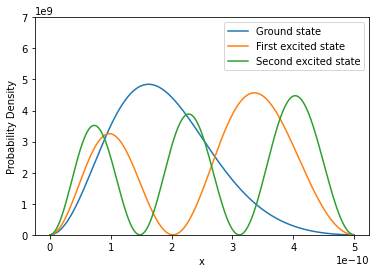

In [ ]:
# Exercise 6.9

from numpy import pi,sin,sqrt
from numpy import empty,linspace,matmul,zeros
from numpy.linalg import eigh
from matplotlib.pyplot import plot,show,legend,xlabel,ylabel,ylim

hbar = 1.0546e-34 # Planck's constant
q = 1.6022e-19 # Electron charge
M = 9.1094e-31 # Electron mass

# Needed to integrate our function
# assumes points separated by equal spacing
def simple_integral(points,h):  
  if (len(points) < 3): return -1   
  n = len(points)

  return h*(points[0]/2+points[n-1]/2 + sum(points[1:n-1])) 


def asymmWell(L,a,N,to_print,DoPlot):

  # Returns element of H
  def H(m,n):
    if (m==n):
      return pi*pi*m*m*hbar*hbar/(2*L*L*M) + 0.5*a
    elif (m+n)%2 == 0: # both even or both odd
      return 0.0
    else:
      return -8*a*m*n/(pi*pi*((m*m-n*n)**2))

  # Construct the matrix being careful about numbering from zero
  Hmat = empty([N,N])
  for m in range(N):
    for n in range(N):
      Hmat[m,n] = H(m+1,n+1) 

  # Calculate values and vectors, can use eigh because Hmat is symmetric, otherwise we couldn't!
  values,vectors = eigh(Hmat)

  # Print results
  for n in range(to_print):
    print("E[",n+1,"] = ",values[n]/q,"eV")
  
  # plot results if necessary
  if (DoPlot):
    Ntoplot = 1000
    xvalues=linspace(0,L,Ntoplot)
    vec0 = vectors[:,0] ## careful, this is the set of ground state coefficients, not the other way around
    vec1 = vectors[:,1] ## careful, this is the set of ground state coefficients, not the other way around
    vec2 = vectors[:,2] ## careful, this is the set of ground state coefficients, not the other way around
    # Cross-check!
    #print(matmul(Hmat,vec0))
    #print(vec0*values[0])
    vector0=zeros([Ntoplot])
    vector1=zeros([Ntoplot])
    vector2=zeros([Ntoplot])

    for i in range(N): 
      vector0 = vector0+vec0[i]*sin(pi*(i+1)*xvalues/L)
      vector1 = vector1+vec1[i]*sin(pi*(i+1)*xvalues/L)
      vector2 = vector2+vec2[i]*sin(pi*(i+1)*xvalues/L)

    ## we want to plot wave function^2
    density0 = vector0*vector0
    density1 = vector1*vector1
    density2 = vector2*vector2
    h = xvalues[1] - xvalues[0]
    int0 = simple_integral(density0,h)
    int1 = simple_integral(density1,h)
    int2 = simple_integral(density2,h)

    print("Integral 0 =",int0)
    print("Integral 1 =",int1)
    print("Integral 2 =",int2)

    density0 = density0/int0
    density1 = density1/int1
    density2 = density2/int2

    plot(xvalues,density0,label="Ground state")
    plot(xvalues,density1,label="First excited state")
    plot(xvalues,density2,label="Second excited state")
    legend(loc='upper right')
    xlabel("x")
    ylabel("Probability Density")
    ylim(0,7e9)
    
    show()


print("Doing 10, printing 10")
asymmWell(5e-10,10*q,10,10,False)
print("")
## Very similar, at least for first energy levels. Start to see small (0.1%) differences at 10th energy level
print("Doing 1000, printing 10")
asymmWell(5e-10,10*q,1000,10,True)

6.13

Rewrite more simply as $I = \frac{z\lambda^{-5}}{e^{q/\lambda}-1}$. Differentiating with respect to $\lambda$ and setting to zero we get:

$\frac{-5z\lambda^{-6}}{e^{q/\lambda}-1}$ - $\frac{z\lambda^{-5}}{(e^{q/\lambda}-1)^2} e^{q/\lambda}\frac{-q}{\lambda^2} = 0$

Simplifying:

$(-5\lambda^{-6})(e^{q/\lambda}-1) + \lambda^{-5} e^{q/\lambda}\frac{q}{\lambda^2} = 0$

$-5(e^{q/\lambda}-1) + e^{q/\lambda}\frac{q}{\lambda} = 0$

$-5e^{q/\lambda}+5 + e^{q/\lambda}\frac{q}{\lambda} = 0$

$-5+5e^{-q/\lambda} + \frac{q}{\lambda} = 0$, plugging in $q=hc/kT$ and reordering we get:

$5e^{-hc/\lambda kT} + \frac{hc}{\lambda kT} -5 = 0$. Plugging in $x=hc/\lambda kT$ we get:

$5e^{-x} + x - 5 = 0$


In [ ]:
# 6.13

from math import exp
def f(x):
  return 5*exp(-x) + x - 5

target = 1e-6
x1 = 0.01
x2 = 10.0
f1 = f(x1)
f2 = f(x2)

while (x2-x1)>target:
  xp = 0.5*(x1+x2)
  fxp = f(xp)
  if (f1*fxp) > 0:
    x1,f1 = xp,fxp
  else:
    x2,f2 = xp,fxp

x = 0.5*(x1+x2)
h = 6.626e-34
c = 3.0e8
k = 1.38e-23

b = h*c/(k*x)

print("x = ",x,"(K)")
print("b = ",b)

l = 502e-9
t = b/l
print("Using peak of sun's radiation, estimated temperature = ",t,"(K)")
# Note, pretty close to accepted value of 5778 K!

x =  4.965114052593709 (K)
b =  0.002901111167539509
Using peak of sun's radiation, estimated temperature =  5779.105911433284 (K)


In [ ]:
# 6.18

# Gaussian Integration code from the textbook online resource
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# We added this one
def integrateGauss(N,a,b,f):
    integral = 0.0
    ## get the sample points and optimal weights
    x,w = gaussxwab(N,a,b)

    # Now we use these in the integration
    for k in range(N):
      integral = integral+w[k]*f(x[k])
    return integral

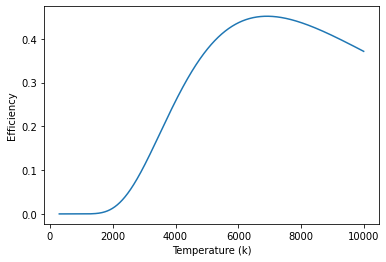

300.0 10000.0 0.25845007751289173
4005.0703091260193 10000.0 0.4451911793978239
4005.0703091260193 7710.14061825204 0.4079087898817055
5420.281236504079 7710.14061825204 0.44340479853501275
6294.929690873981 7710.14061825204 0.4516002197494002
6294.929690873981 7169.5781452438805 0.45039898957513136
6629.015672235721 7169.5781452438805 0.4507441962982818
6835.49216388214 7169.5781452438805 0.45165672804497303
6835.49216388214 7041.96865552856 0.4516938274343786
6835.49216388214 6963.101653597461 0.4516808165902288
6835.49216388214 6914.359165813238 0.45165879694287886
6835.49216388214 6884.234651666362 0.4516397891212585
6835.49216388214 6865.616678029016 0.45162596530140475
6835.49216388214 6854.110137519486 0.45161662527514507
6835.49216388214 6846.998704391669 0.4516105478193652
6835.49216388214 6842.6035970099565 0.4516066750578573
6835.49216388214 6839.887271263852 0.45160423694491236
6835.49216388214 6838.208489628244 0.4516027130565221
6835.49216388214 6837.170945517748 0.451601

In [ ]:
# 6.18, uses above
from numpy import exp,pi,sqrt,arange
from matplotlib.pyplot import plot,xlabel,ylabel

h = 6.626e-34 
c = 2.99e8
kB = 1.38e-23

l1 = 390.0e-9
l2 = 750.0e-9
N = 100

Tlo = 300.0
Thi = 10000.0
target = 1.0
z = (-1 + sqrt(5))/2

dt = 10

x,w = gaussxw(N)

# Integrant
def f(x):
  return x**3/(exp(x)-1)

# Function to calculate efficiency
def eta(T):
  a = h*c/(l2*kB*T)
  b = h*c/(l1*kB*T)
  xp = 0.5*(b-a)*x + 0.5*(b+a)
  wp = 0.5*(b-a)*w
  s = 0.0
  for k in range(N):
    s += wp[k]*f(xp[k])
  return 15*s/(pi**4)

# Let's make a plot, first
ts = arange(Tlo,Thi,dt)
es = []
for t in ts:
  es.append(eta(t))

plot(ts,es)
xlabel("Temperature (k)")
ylabel("Efficiency")
show()

# Starting values of temperate points
T1 = Tlo
T2 = Thi - z*(Thi - Tlo)
T3 = Tlo + z*(Thi - Tlo)
T4 = Thi

eta1 = eta(T1)
eta2 = eta(T2)
eta3 = eta(T3)
eta4 = eta(T4)

# Main loop
while (T4-T1) > target:
  print(T1,T4,eta2)

  # Work out which 3 points are the new bracket
  if (eta2 > eta3):
    T4,eta4 = T3,eta3
    T3,eta2 = T2,eta2
    T2 = T4 - z*(T4-T1)
    eta2 = eta(T2)
  else:
    T1,eta1 = T2,eta2
    T2,eta2 = T3,eta3
    T3 = T1 + z*(T4-T1)
    eta3 = eta(T3)

print(T1,T4,eta2)
##Clearly we can't run a lightbulb at ~6800-6900 K. Tungsten would melt! 

We are looking to find x = sqrt(a), $→ x^2 = a$. So we want to find the roots of $f(x) = x^2 - a = 0$. Taking the derivative of f(x), $f' = 2x$

Plugging into Newton's method, we get $x' = x - \frac{x^2 - a}{2x}$

Or $x' = x - \frac{x}{2} + \frac{a}{2x} = \frac{x}{2} + \frac{a}{2x}$


In [4]:
import numpy as np

a=2
x=np.longdouble(1) ### biggest precision we can get, that is our initial guess
n=15 ### not that many loops!
for i in range(n):
  print(x)
  x=0.5*(x+a/x)
print("square root from numpy is",np.sqrt(a),"and calculated value = ",x,"and diff = ",np.sqrt(a)-x)

1.0
1.5
1.4166666666666666667
1.4142156862745098039
1.4142135623746899106
1.4142135623730950488
1.4142135623730950488
1.4142135623730950488
1.4142135623730950488
1.4142135623730950488
1.4142135623730950488
1.4142135623730950488
1.4142135623730950488
1.4142135623730950488
1.4142135623730950488
square root from numpy is 1.4142135623730951 and calculated value =  1.4142135623730950488 and diff =  9.6710833785706995513e-17
